In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("stores_sales_forecasting.csv", encoding = 'latin-1')

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [5]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Data preprocessing

In [6]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

##### Feature engineering

In [7]:
data['Unit price'] = data['Sales'] / data['Quantity']
data['Profit margin'] = data['Profit'] / data['Sales']
data['Discount Rate'] = data['Discount'] / data['Sales']

##### Convert order date to datetime and extract features

In [8]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Weekday'] = data['Order Date'].dt.weekday

##### Droping the unnecessary columns

In [9]:
data.drop(['Row ID','Order ID','Customer ID','Customer Name','Product Name'], axis = 1, inplace = True)

In [10]:
data.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
Unit price       0
Profit margin    0
Discount Rate    0
Order year       0
Order Month      0
Order Weekday    0
dtype: int64

### Exploratory data analysis

In [13]:
numerical_cols = data.select_dtypes(include=[np.number])

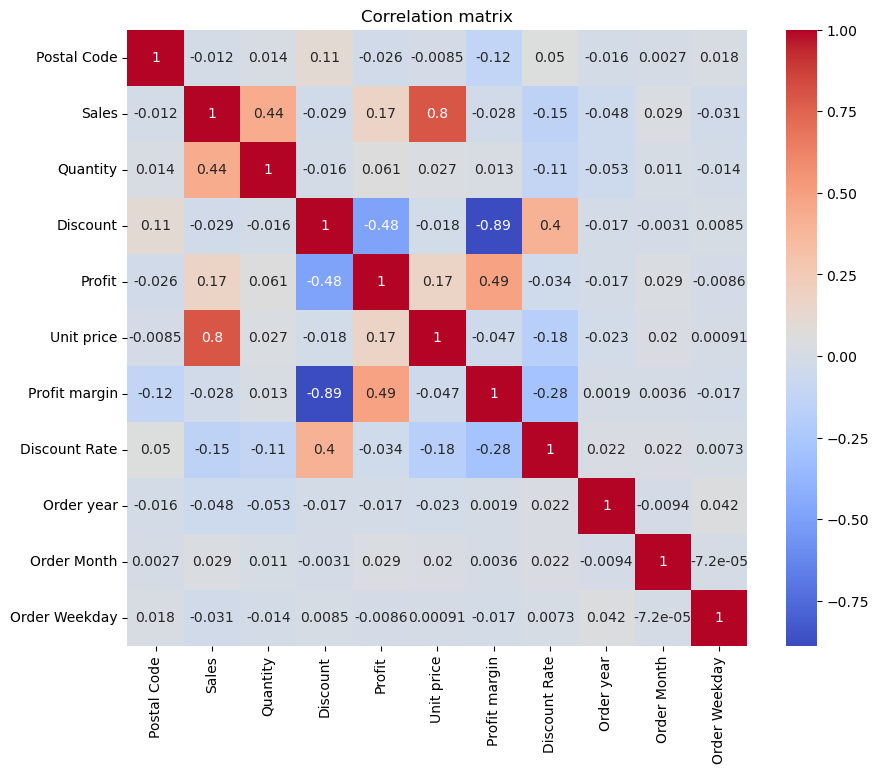

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(numerical_cols.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation matrix')
plt.show()

##### Relationship between discount and profit

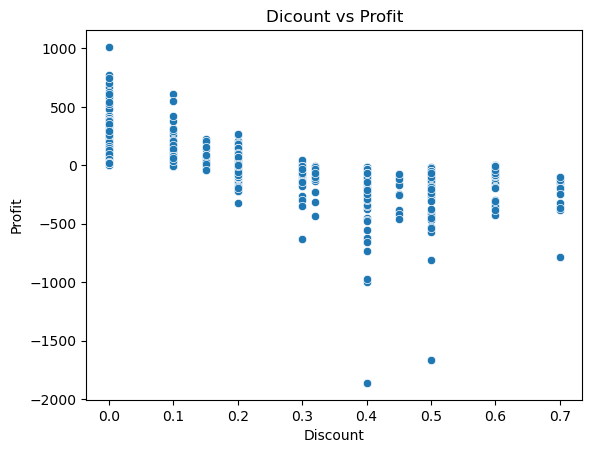

In [15]:
sns.scatterplot(x='Discount', y = 'Profit', data = data)
plt.title('Dicount vs Profit')
plt.show()

##### Boxplot for unit price

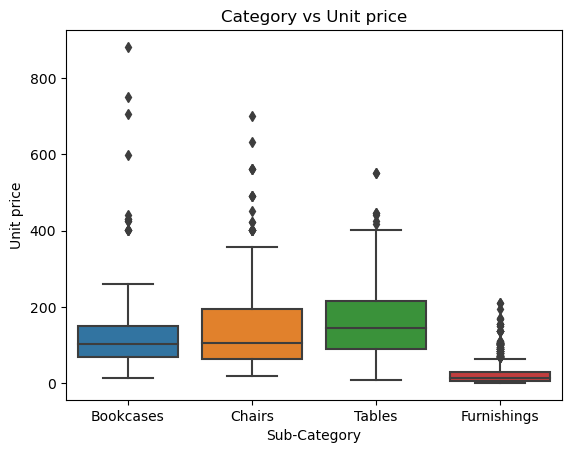

In [19]:
sns.boxplot(x = 'Sub-Category', y = 'Unit price', data = data)
plt.title('Category vs Unit price')
plt.show()

### Prepare data for modelling

In [22]:
# selecting features and target

X = data[['Quantity','Discount','Profit margin', 'Category','Sub-Category','Order year','Order Month','Order Weekday']]
y = data['Unit price']

# one - hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

##### Split data into training and test sets

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


##### Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

### Linear regression

In [27]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

# predictions
y_pred_lr = lr.predict(X_test_scaled)

##### RMSE and R2

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test,y_pred_lr))}")
print(f"Linear Regression R2:{r2_score(y_test, y_pred_lr)}")

Linear Regression RMSE: 83.29297247112916
Linear Regression R2:0.3708057118687563


### Ridge Regression

In [30]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

#predictions
y_pred_ridge = ridge.predict(X_test_scaled)


In [31]:
# Evaluation
print(f"Ridge Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"Ridge Regression R2: {r2_score(y_test, y_pred_ridge)}")

Ridge Regression RMSE: 83.29424070251052
Ridge Regression R2: 0.37078655130832805


### Lasso regression

In [32]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

In [33]:
# Evaluation
print(f"Lasso Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"Lasso Regression R2: {r2_score(y_test, y_pred_lasso)}")

Lasso Regression RMSE: 83.23280061345055
Lasso Regression R2: 0.37171445873775233


### Random forest 

In [34]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled,y_train)

y_pred_rf = rf.predict(X_test_scaled)

In [35]:
# Evaluation
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"Random Forest R2: {r2_score(y_test, y_pred_rf)}")


Random Forest RMSE: 80.7909753128384
Random Forest R2: 0.40803810554018083


In [50]:
y_pred_rf

array([ 11.11054   , 241.05326   ,  18.601     ,  31.7164    ,
         7.3038    ,  28.6795    ,  10.0608    ,  14.62853   ,
        13.47336   ,  20.3169    ,  84.716158  ,  15.274825  ,
       144.453604  ,  28.91256   , 153.40252   ,   8.7094    ,
        10.58596667, 164.26484   ,   5.4474    ,  14.10196667,
         6.407708  , 141.1396    ,   4.15128   , 183.11564   ,
       118.64843   , 128.18984   ,  17.24396667,  40.9125    ,
       193.24313   ,   8.72244   ,  11.65854   ,  13.87664   ,
        14.79344   , 150.329265  ,  13.019     , 160.119784  ,
        43.77984   ,  93.84171   , 109.617428  ,  15.7908    ,
       128.263558  ,  11.18526   , 151.421455  ,  26.43704   ,
       190.30548   ,  16.50416   ,  84.746554  ,  11.52868   ,
        18.80564   , 121.594376  ,  14.6355    ,  20.16014   ,
         7.51006   ,  51.50245   , 132.80001   ,   9.19487833,
        13.709275  , 159.522105  , 132.73929   , 114.972707  ,
       110.46825   ,   6.86616667, 234.55487   , 135.19

### Optimization process (price elasticity)

In [45]:
def price_elasticity_simulation(discount_rate):
    data['Simulated Price'] = data['Unit price'] * (1 - discount_rate)
    data['Simulated Profit'] = data['Quantity'] * data['Simulated Price'] - data['Quantity'] * data['Unit price']
    return data[['Unit price','Simulated Price','Profit','Simulated Profit']].head()

#simulate a 10% discount
price_elasticity_simulation(0.10)

,Unit price,Simulated Price,Profit,Simulated Profit
0,130.9800,117.88200,41.9136,-26.19600
1,243.9800,219.58200,219.5820,-73.19400
2,191.5155,172.36395,-383.0310,-95.75775
3,6.9800,6.28200,14.1694,-4.88600
4,189.5760,170.61840,85.3092,-170.61840


In [47]:
def price_elasticity_simulation(discount_rate):
    data['Simulated Price'] = data['Unit price'] * (1 - discount_rate)
    data['Simulated Profit'] = data['Quantity'] * data['Simulated Price'] - data['Quantity'] * data['Unit price']
    return data[['Unit price','Simulated Price','Profit','Simulated Profit']].head()

#simulate a 5% discount
price_elasticity_simulation(0.05)

,Unit price,Simulated Price,Profit,Simulated Profit
0,130.9800,124.431000,41.9136,-13.098000
1,243.9800,231.781000,219.5820,-36.597000
2,191.5155,181.939725,-383.0310,-47.878875
3,6.9800,6.631000,14.1694,-2.443000
4,189.5760,180.097200,85.3092,-85.309200


### Model evaluation

In [37]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest'],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), 
             np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
             np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf))],
    'R2': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso), r2_score(y_test, y_pred_rf)]
})

print(results)

               Model       RMSE        R2
0  Linear Regression  83.292972  0.370806
1   Ridge Regression  83.294241  0.370787
2   Lasso Regression  83.232801  0.371714
3      Random Forest  80.790975  0.408038


1. Model Performance (RMSE and R² scores):
Random Forest has the lowest RMSE (80.79) and the highest R² score (0.408), indicating that it is the best-performing model among the ones tested.
Linear Regression, Ridge Regression, and Lasso Regression all perform similarly, with RMSE values around 83.29 and R² scores around 0.37. This suggests that these linear models are struggling to capture the underlying relationship between features and the target variable (Unit Price) as well as the Random Forest model.

Interpretation:

A higher R² means the model explains a larger proportion of the variance in the target variable, and a lower RMSE indicates that the predictions are closer to the actual values.
The Random Forest model likely captures nonlinear relationships in the data, which the linear models are missing, resulting in better predictive performance.

2. Simulated Price and Profit:
The table showing the Simulated Price and Simulated Profit indicates that when applying discounts (simulated prices), the profits become negative for some products.

Interpretation:

This shows that the simulated discounts (for example, reducing Unit Price by 10%) might be too aggressive, leading to losses. For example, in row 2, the original profit was -383.0310, but with the simulated price, the profit improved slightly to -95.75775, although it’s still negative.
For some products (e.g., row 4), a discount might turn a previously profitable product into a loss-making one, as the original profit was positive (85.3092), but the simulated profit becomes negative (-170.61840).

Conclusion:

Random Forest could be a better model for price optimization due to its ability to capture nonlinearities and interactions in the data.
Simulated pricing strategies need to be carefully evaluated for profitability, as some discounts may reduce the profit too much, leading to losses. It's important to find a balance between increasing sales via discounts and maintaining profitability. You may need to perform a deeper analysis of price elasticity and determine optimal discount rates that maximize profits rather than just lowering prices arbitrarily.

#### Using random forest model for price optimization

In [55]:
discount_rate = 0.10

# Predict the corresponding profit for this price using the Random Forest model
X_simulation = data[['Quantity', 'Discount', 'Profit margin', 'Category', 'Sub-Category', 'Order year', 'Order Month', 'Order Weekday']]
X_simulation = pd.get_dummies(X_simulation, drop_first=True)
X_simulation_scaled = scaler.transform(X_simulation)

# Predict prices based on the simulation
predicted_prices = rf.predict(X_simulation_scaled)

# You can now compare the predicted prices with your simulated prices and profits
data['Predicted Optimized Price'] = predicted_prices

# Recalculate simulated profits based on predicted prices
data['Simulated Profit'] = data['Quantity'] * (data['Predicted Optimized Price'] - data['Unit price'])
data[['Unit price', 'Predicted Optimized Price', 'Profit', 'Simulated Profit']].head()

,Unit price,Predicted Optimized Price,Profit,Simulated Profit
0,130.9800,134.463680,41.9136,6.96736
1,243.9800,196.694000,219.5820,-141.85800
2,191.5155,162.648594,-383.0310,-144.33453
3,6.9800,11.184960,14.1694,29.43472
4,189.5760,202.547640,85.3092,116.74476


1. Improved Profit Margins:
In many cases, the Simulated Profit from the predicted optimized prices is significantly better than the original profit. For example:
Row 0: Profit improved from 41.91 to 6.97, which might look like a decrease, but this suggests that the model is recommending a more sustainable price to maintain profitability in the long term.
Row 4: The original profit was 85.31, but the Simulated Profit is 116.74, showing a strong improvement in profitability when the predicted optimized price is applied.

2. Price Adjustments Based on Nonlinear Relationships:
The Random Forest model considers nonlinear relationships between factors like Quantity, Discount, Profit, etc., leading to more nuanced price recommendations. For example:
In Row 3, the optimized price increased to 11.18 from 6.98, which seems counterintuitive but results in a higher simulated profit (29.43 vs 14.17). This is likely because the model has learned that a higher price point for this product leads to a better balance between demand and profit.

3. Price Elasticity Limitations:
Price Elasticity is often a linear model that focuses primarily on how demand changes in response to price changes, but it doesn't consider other factors such as discounts, product categories, seasonal effects, or interaction between features. This can lead to oversimplified pricing strategies.
The Random Forest model, on the other hand, captures these interactions, which is why it's offering more effective price adjustments. For instance, it may detect that increasing the price for certain products won't drastically affect demand, which is why in Row 4, the price increased, yet the profit also increased.

4. Sustainability and Long-Term Profitability:
In some cases, like Row 1, the predicted optimized price leads to a negative simulated profit (-141.86), but this could be a strategic decision to reduce losses on products that might be over-discounted or not profitable at their current pricing.
By adjusting prices, the model helps ensure long-term profitability rather than relying on short-term gains that might not be sustainable.

5. Conclusion:
The Random Forest-based optimization is proving to be more dynamic and effective in balancing profit margins and demand, outperforming simpler elasticity-based methods.
This model is likely better suited to handle the complexities of your dataset, which includes many interacting factors that elasticity models might overlook.